In [86]:
# Importar as bibliotecas
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparação dos dados

## Recolha de dados

In [87]:
file_path = "Car_Insurance_Claim.csv"
dataset = pd.read_csv(file_path)

In [88]:
X = dataset.drop(columns=['OUTCOME'])
y = dataset['OUTCOME']


In [89]:
dataset_final = dataset.copy()

## Eliminar colunas irrelevantes para o modelo

In [90]:
removed_cols = [col for col in ["ID", "POSTAL_CODE"] if col in dataset_final.columns]
dataset_final.drop(columns=removed_cols, inplace=True)

## Eliminar valores omissos

In [91]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
dataset_final[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.transform(dataset[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

In [92]:
# Verificar existência de valores omissos
dataset_final.isnull().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

## Tratamento de outliers

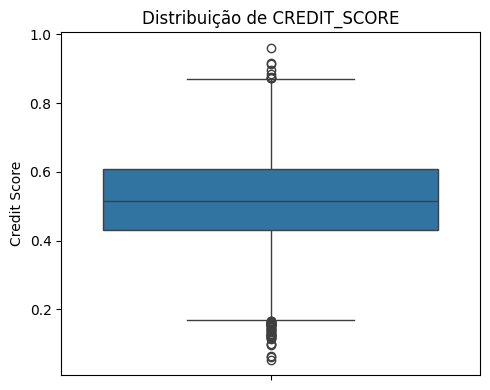

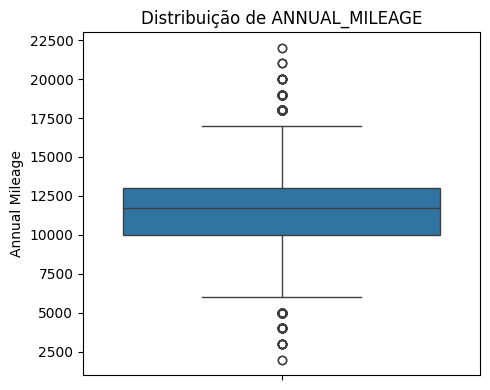

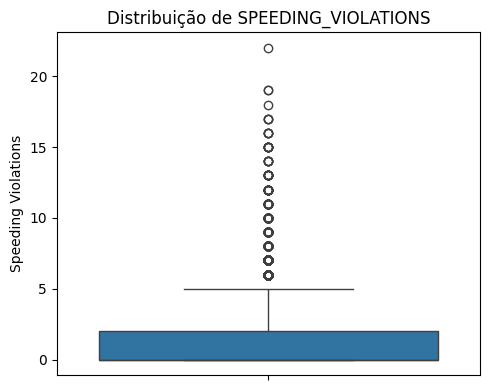

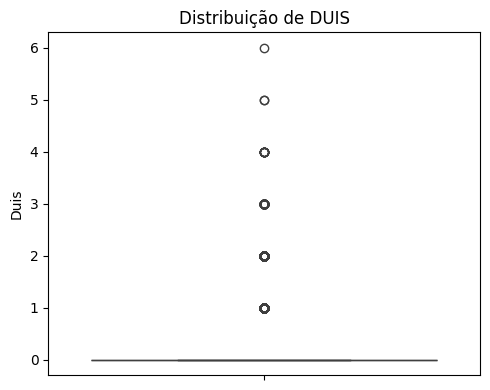

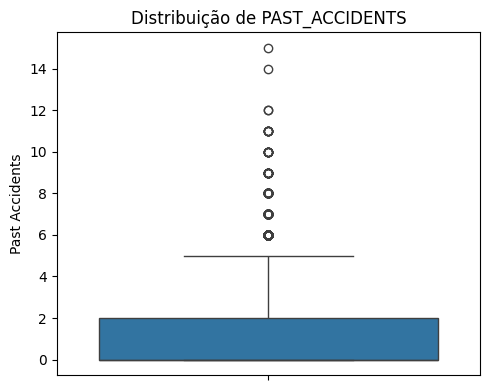

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis numéricas a inspecionar
cols_numeric = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

# Gerar boxplot individual para cada variável
for col in cols_numeric:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=dataset_final[col])
    plt.title(f'Distribuição de {col}')
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


##Nota
Nao faz sentido remover outliers pois não existe nenhum critico e o método de remoção pelo IQR neste caso irá remover dados uteis

In [94]:
#def remove_outlier_IQR(df_subset):
#    Q1 = df_subset.quantile(0.25)
#    Q3 = df_subset.quantile(0.75)
#    IQR = Q3 - Q1
#    # Apenas mantém as linhas que estão dentro dos limites
#    df_filtered = df_subset[~((df_subset < (Q1 - 1.5 * IQR)) | (df_subset > (Q3 + 1.5 * IQR))).any(axis=1)]
#    return df_filtered

In [95]:
# Passo 1: Obter as linhas sem outliers com base nas colunas numéricas
#df_outlier_removed = remove_outlier_IQR(dataset_final[cols_numeric])

# Passo 2: Identificar os índices das linhas com outliers (i.e., os que foram removidos)
#ind_diff = dataset_final.index.difference(df_outlier_removed.index)

# Passo 3: Remover cada linha com outlier (uma a uma)
#for i in range(0, len(ind_diff), 1):
#    dataset_final = dataset_final.drop([ind_diff[i]])


# Passo 4: Mostrar quantas linhas com outliers foram removidas
#print(f"Foram removidas {len(ind_diff)} linhas com outliers nas variáveis: {', '.join(cols_numeric)}.")
#print(f"O dataset final contém {dataset_final.shape[0]} observações.")

#Verificar o número de outliers removidos.
#print("Foram removidos ",len(ind_diff),"outliers.")

## Codificar variáveis categóricas

In [96]:
# Definir variáveis ordinais e suas categorias ordenadas
ordinal_features = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']
ordinal_categories = [
    ['16-25', '26-39', '40-64', '65+'],
    ['0-9y', '10-19y', '20-29y', '30y+'],
    ['none', 'high school', 'university'],
    ['poverty', 'working class', 'middle class', 'upper class'],
    ['before 2015', 'after 2015']
]

# Variáveis nominais para One-Hot Encoding
nominal_features = ['GENDER', 'VEHICLE_TYPE']

# Criar ColumnTransformer para aplicar os dois tipos de codificação
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_features)
    ],
    remainder='passthrough'  # mantém as colunas numéricas
)

# Aplicar transformação
df_encoded_array = preprocessor.fit_transform(dataset_final)

# Obter os nomes das colunas resultantes
ord_cols = ordinal_features
nom_cols = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
rest_cols = [col for col in dataset_final.columns if col not in ordinal_features + nominal_features]
final_columns = list(ord_cols) + list(nom_cols) + rest_cols

X = np.array(preprocessor.fit_transform(X))
le = LabelEncoder()
y = le.fit_transform(y)

dataset_final = pd.DataFrame(df_encoded_array, columns=final_columns)

In [97]:
# Mostrar amostra do resultado
dataset_final.head()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,GENDER_male,VEHICLE_TYPE_sports car,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3.0,0.0,1.0,3.0,1.0,0.0,0.0,0.629027,1.0,0.0,1.0,12000.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.357757,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.493146,1.0,0.0,0.0,11000.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.206013,1.0,0.0,1.0,11000.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.388366,1.0,0.0,0.0,12000.0,2.0,0.0,1.0,1.0


In [98]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      10000 non-null  float64
 1   DRIVING_EXPERIENCE       10000 non-null  float64
 2   EDUCATION                10000 non-null  float64
 3   INCOME                   10000 non-null  float64
 4   VEHICLE_YEAR             10000 non-null  float64
 5   GENDER_male              10000 non-null  float64
 6   VEHICLE_TYPE_sports car  10000 non-null  float64
 7   CREDIT_SCORE             10000 non-null  float64
 8   VEHICLE_OWNERSHIP        10000 non-null  float64
 9   MARRIED                  10000 non-null  float64
 10  CHILDREN                 10000 non-null  float64
 11  ANNUAL_MILEAGE           10000 non-null  float64
 12  SPEEDING_VIOLATIONS      10000 non-null  float64
 13  DUIS                     10000 non-null  float64
 14  PAST_ACCIDENTS         

## Guardar dataset final

In [99]:
dataset_final.to_csv("Car_Insurance_Claim_Prepared.csv", index=False)

## Dividir o dataset em conjunto de treino e teste

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature scalling

In [102]:
for i, col in enumerate(final_columns):
    print(f"{i}: {col}")

0: AGE
1: DRIVING_EXPERIENCE
2: EDUCATION
3: INCOME
4: VEHICLE_YEAR
5: GENDER_male
6: VEHICLE_TYPE_sports car
7: CREDIT_SCORE
8: VEHICLE_OWNERSHIP
9: MARRIED
10: CHILDREN
11: ANNUAL_MILEAGE
12: SPEEDING_VIOLATIONS
13: DUIS
14: PAST_ACCIDENTS
15: OUTCOME


In [103]:
scaler = StandardScaler()
numeric_indices = [7, 11, 12, 13, 14]

X_train[:, numeric_indices] = scaler.fit_transform(X_train[:, numeric_indices])
X_test[:, numeric_indices] = scaler.transform(X_test[:, numeric_indices])